Hybrid Forex prediction model using multiple regression, simulated annealing, reinforcement learning and technical analysis

https://www.researchgate.net/profile/Chihab-Younes/publication/366165718_Hybrid_Forex_prediction_model_using_multiple_regression_simulated_annealing_reinforcement_learning_and_technical_analysis/links/6393e9e0e42faa7e75aefbac/Hybrid-Forex-prediction-model-using-multiple-regression-simulated-annealing-reinforcement-learning-and-technical-analysis.pdf?origin=publication_detail

In [238]:
import MetaTrader5 as mt5
from datetime import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mt5.initialize()
account=51127988
password="Aar2frM7"
server = 'ICMarkets-Demo'

In [239]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import ta

In [240]:
def get_rates(pair1, timeframe, x):
    pair1 = pd.DataFrame(mt5.copy_rates_from_pos(pair1, timeframe, 0, x))
    pair1['time'] = pd.to_datetime(pair1['time'], unit = 's')
    return pair1


In [294]:
EURUSD = get_rates('AUDUSD.a', mt5.TIMEFRAME_D1, 500)
EURUSD = EURUSD[['close']]
for i in range(1,7):
    EURUSD[f'Period {i}'] = EURUSD['close'].shift(i)

EURUSD['2w'] = EURUSD['close'].rolling(window = 14).mean()
EURUSD['1m'] = EURUSD['close'].rolling(window = 30).mean()

EURUSD['rsi'] = ta.momentum.rsi(EURUSD['close'], window = 14, fillna = False)

EURUSD = EURUSD.dropna()

In [295]:
EU_x = EURUSD
EU_x = EU_x.drop('close', axis = 1)

In [296]:
# Defining X (features) and y (target)
X = EU_x
X = X.dropna()
y = EURUSD['close']

In [297]:
##Define the model
from sklearn.linear_model import LinearRegression
# Create and train the model (replace with your actual training code)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [301]:
vals = pd.DataFrame()  # Create an empty DataFrame

for i in range(1, 251):  # Let's make sure it's consistent with the '250' you mentioned earlier
    today_features = X.iloc[-i]
    today_price = model.predict([today_features])[0]
    
    vals = vals.append({'Predicted': today_price, 'Actual': EURUSD['close'].iloc[-i]}, ignore_index=True)

vals = vals[::-1].reset_index(drop=True)  # Reverse the order to match the original sequence

<AxesSubplot:>

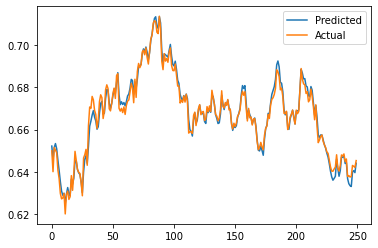

In [303]:
vals.plot()

In [300]:
vals = pd.DataFrame()

for i in range(250):
    today_features = X.iloc[-i]
    today_price = model.predict([today_features])[0]
    vals['Predicted'] = vals.append([today_price])
    vals['Actual'] = EURUSD['close'].iloc[-i]

ValueError: Columns must be same length as key

In [288]:
vals = pd.DataFrame(vals)
vals['closes'] = EURUSD['close'][-250:]
vals

,0,closes
0,0.710658,NaN
0,0.640054,NaN
0,0.641066,NaN
0,0.640130,NaN
0,0.633864,NaN
...,...,...
0,0.649905,NaN
0,0.652233,NaN
0,0.652442,NaN
0,0.646648,NaN


In [245]:
# # Weighted regression
# model = sm.OLS(y, EU_x).fit()

# # Get predictions (for example purposes)
# predictions = model.predict(X)

In [263]:
vals = []
for i in range(50):
    predicted_price = model.predict(EU_x.iloc[-i])
    # print(f"{predicted_price.values[0]:.5f} vs actual close: {EURUSD['close'].iloc[-i]:.5f}")
    vals.append(predicted_price.values[0] - EURUSD['close'].iloc[i])

# Later, if you want to convert vals to a DataFrame or Series:
vals_df = pd.DataFrame(vals)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.72243     0.72345     0.72762     0.72648     0.73019     0.7343
  0.73158357  0.73981633 29.87650061].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<AxesSubplot:>

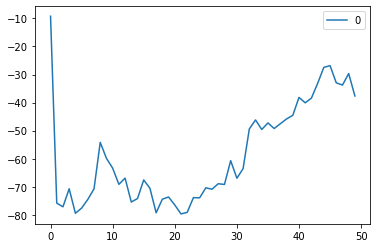

In [247]:
vals_df = vals_df * 1000
vals_df.plot()

In [248]:
predicted_price = model.predict(EU_x.iloc[-1])
predicted_price

None    0.643651
dtype: float64

In [251]:
EURUSD = get_rates('AUDUSD.a', mt5.TIMEFRAME_D1, 500)
EURUSD = EURUSD[['close']]
for i in range(1,7):
    EURUSD[f'Period {i}'] = EURUSD['close'].shift(i)

EURUSD['2w'] = EURUSD['close'].rolling(window = 14).mean()
EURUSD['1m'] = EURUSD['close'].rolling(window = 30).mean()
EURUSD['rsi'] = ta.momentum.rsi(EURUSD['close'], window = 14, fillna = False)

# Shift close for predicting the next period's close
EURUSD['future_close'] = EURUSD['close'].shift(-1)

# Drop rows with NaN
EURUSD = EURUSD.dropna()

# Defining X (features) and y (target)
X = EURUSD.drop(columns=['close', 'future_close'])
y = EURUSD['future_close']

# Weighted regression
model = sm.OLS(y, X).fit()

# Predict the next period's close using the most recent predictors
predicted_data = X.iloc[-1].values.reshape(1, -1)  # reshape to 2D array
predicted_price = model.predict(predicted_data)
print(predicted_price)


[0.64517111]


In [255]:
EURUSD = get_rates('AUDUSD.a', mt5.TIMEFRAME_D1, 500)
EURUSD = EURUSD[['close']]
for i in range(1,7):
    EURUSD[f'Period {i}'] = EURUSD['close'].shift(i)

EURUSD['2w'] = EURUSD['close'].rolling(window = 14).mean()
EURUSD['1m'] = EURUSD['close'].rolling(window = 30).mean()
EURUSD['rsi'] = ta.momentum.rsi(EURUSD['close'], window = 14, fillna = False)

# Shift close for predicting the next period's close
EURUSD['future_close'] = EURUSD['close'].shift(-1)

# Drop rows with NaN
EURUSD = EURUSD.dropna()

# Defining X (features) and y (target)
X = EURUSD.drop(columns=['close', 'future_close'])
y = EURUSD['future_close']

# Weighted regression
model = sm.OLS(y, X).fit()

# Predict the next period's close using the most recent predictors
predicted_data = X.iloc[-1].values.reshape(1, -1)  # reshape to 2D array
predicted_price = model.predict(predicted_data)
print(predicted_price)


[0.64097945]
